In [25]:
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import ast

In [26]:
df  = pd.read_csv('DataBase.csv')
df.head()

device  \
0  {'time': 49.463, 's2': {'ax': -0.08379706, 'ay...   
1  {'time': 49.523, 's2': {'ax': -0.1651999, 'ay'...   
2  {'time': 49.523, 's2': {'ax': -0.1651999, 'ay'...   
3  {'time': 49.543, 's2': {'ax': -0.07900865, 'ay...   
4  {'time': 49.563, 's2': {'ax': -0.04309563, 'ay...   

                                              kernel  
0  {'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ...  
1  {'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ...  
2  {'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ...  
3  {'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ...  
4  {'pitch': 0.0, 'roll': 0.0, 'yaw': 0.0, 'wx': ...

# CONVERSÃO DE DADOS

In [27]:
df = df.head(20000).copy()

In [28]:
target = df.device.apply(ast.literal_eval).apply(pd.Series)
target

time                                                 s2  \
0     49.463  {'ax': -0.08379706, 'ay': 0.6105214, 'wz': -0....   
1     49.523  {'ax': -0.1651999, 'ay': 0.581791, 'wz': -0.01...   
2     49.523  {'ax': -0.1651999, 'ay': 0.581791, 'wz': -0.01...   
3     49.543  {'ax': -0.07900865, 'ay': 0.6847417, 'wz': -0....   
4     49.563  {'ax': -0.04309563, 'ay': 0.5865794, 'wz': -0....   
...      ...                                                ...   
3761  96.693  {'ax': -0.06464344, 'ay': -0.3878607, 'wz': -0...   
3762  96.693  {'ax': -0.06464344, 'ay': -0.3878607, 'wz': -0...   
3763  96.713  {'ax': -0.004788403, 'ay': -0.002394202, 'wz':...   
3764  96.733  {'ax': -0.02394202, 'ay': -0.4668693, 'wz': -0...   
3765  96.733  {'ax': -0.02394202, 'ay': -0.4668693, 'wz': -0...   

                                                     s1  
0     {'ax': -0.09816227, 'ay': 0.581791, 'wz': -0.0...  
1     {'ax': -0.09816227, 'ay': 0.5722142, 'wz': -0....  
2     {'ax': -0.09816227, 'ay': 0.5722142, 'wz': -0....  
3     {'ax': -0.05506664, 'ay': 1.223437, 'wz': -0.0...  
4     {'ax': -0.07900865, 'ay': 0.5770026, 'wz': -0....  
...                                                 ...  
3761  {'ax': -0.002394202, 'ay': -0.3902549, 'wz': -...  
3762  {'ax': -0.002394202, 'ay': -0.3902549, 'wz': -...  
3763  {'ax': -0.02873042, 'ay': -0.3280056, 'wz': -0...  
3764  {'ax': -0.05027823, 'ay': -0.4668693, 'wz': -0...  
3765  {'ax': -0.05027823, 'ay': -0.4668693, 'wz': -0...  

[3766 rows x 3 columns]

In [29]:
desired = df.kernel.apply(ast.literal_eval).apply(pd.Series)
desired

pitch  roll     yaw   wx   wy   wz     ax    ay     az
0      0.00  0.00    0.00  1.0  2.0 -3.0 -100.0 -54.0  484.0
1      0.00  0.00    0.00  1.0  2.0 -3.0 -100.0 -54.0  484.0
2      0.00  0.00    0.00  1.0  2.0 -3.0 -100.0 -54.0  484.0
3      0.00  0.00    0.00  1.0  2.0 -3.0 -100.0 -54.0  484.0
4      0.00  0.00    0.00  1.0  2.0 -3.0 -100.0 -54.0  484.0
...     ...   ...     ...  ...  ...  ...    ...   ...    ...
3761  -0.16  6.28  348.97 -2.0 -8.0 -2.0  -54.0   1.0  496.0
3762  -0.16  6.28  348.97 -2.0 -8.0 -2.0  -54.0   1.0  496.0
3763  -0.16  6.28  348.97 -2.0 -8.0 -2.0  -54.0   1.0  496.0
3764  -0.16  6.28  348.97 -4.0  5.0  0.0  -50.0   5.0  499.0
3765  -0.16  6.28  348.97 -4.0  5.0  0.0  -50.0   5.0  499.0

[3766 rows x 9 columns]

# VISUALIZAÇÃO SIMPLES

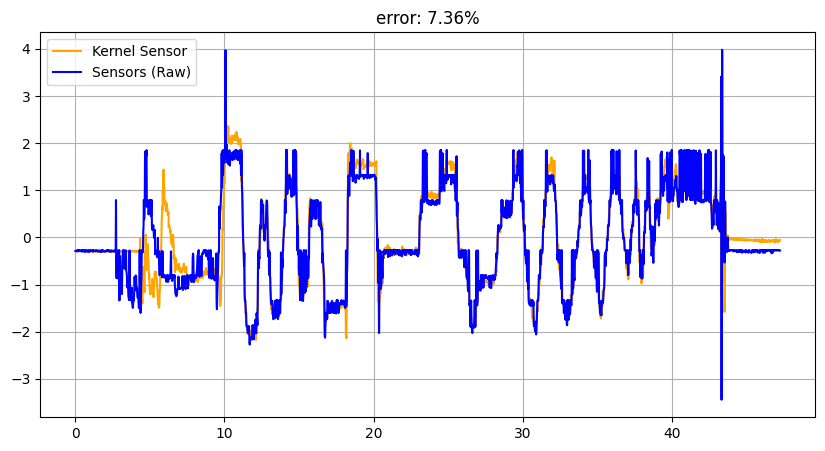

In [30]:
target['time']  = target.time - target.time.values[0]
desired['time'] = target.time.values

def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    return data1, data2, score


d, t, score = compare(desired.ax, [s['ax'] for s in target['s1']])
plt.figure(figsize=(10, 5))
plt.plot(desired.time, d, color='orange', label='Kernel Sensor')
plt.plot(desired.time, t, color='blue',  label='Sensors (Raw)')
plt.title(f'error: {score*100:.2f}%')
plt.legend(), plt.grid()
plt.show()

# APLICANDO LIMITES

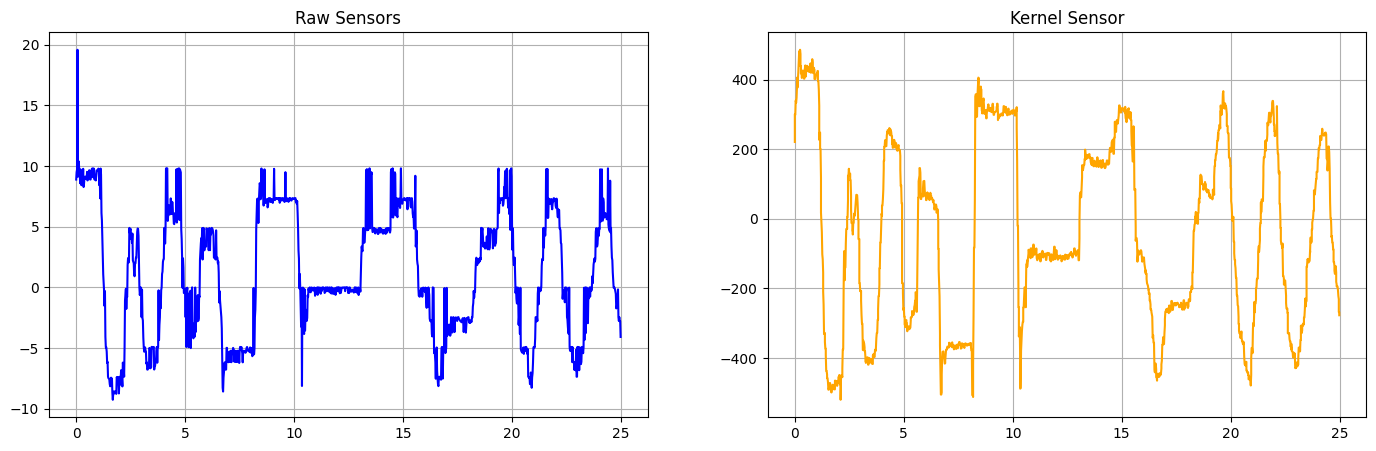

In [31]:
def applyRange(df, range=None):
    if range is None:
        return df
    
    df = df.copy().loc[(df.time > range[0]) & (df.time < range[1])]
    df['time'] = df.time - df.time.values[0]
    return df


SAMPLE_RANGE = (10, 35)
target  = applyRange(target,  SAMPLE_RANGE)
desired = applyRange(desired, SAMPLE_RANGE) 

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.plot(target.time, [s['ax'] for s in target['s1']], color='blue')
plt.title('Raw Sensors')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(desired.time, desired.ax, color='orange')
plt.title('Kernel Sensor')
plt.grid()

# TRATAMENTO E VISUALIZAÇÃO

In [32]:
def normalize(data):
    return np.array(data - np.mean(data))/np.std(data)

def compare(data1, data2):
    data1 = normalize(data1)
    data2 = normalize(data2)
    score = wasserstein_distance(data1, data2)
    return data1, data2, score

def adjustData(df):
    df = df.copy()

    for i, row in df.iterrows():
        row['s1']['ay'] = -row['s1']['ay']
        row['s1']['wy'] = -row['s1']['wy'] 
        row['s1']['az'] = -row['s1']['az']
        row['s1']['wz'] = -row['s1']['wz'] 

        row['s2']['ay'] = -row['s2']['ay']
        row['s2']['wy'] = -row['s2']['wy'] 
        row['s2']['az'] = -row['s2']['az']
        row['s2']['wz'] = -row['s2']['wz'] 
        
    return df

target = adjustData(target)

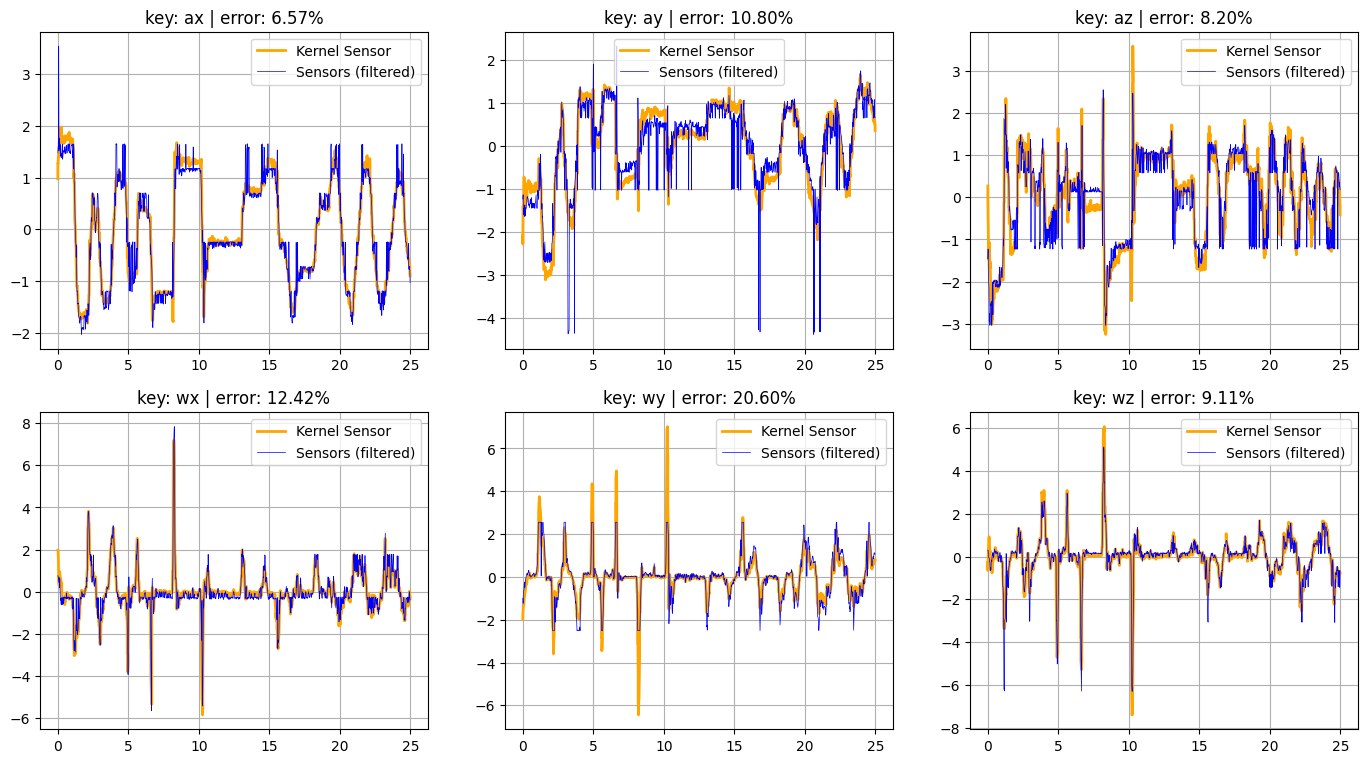

In [33]:
plt.figure(figsize=(17, 14))
index  = 0
sensor = 's1'

for key in ['ax', 'ay', 'az', 'wx', 'wy', 'wz']:
    d, t, score = compare(desired[key], [s[key] for s in target[sensor]])
    index = index + 1

    plt.subplot(3, 3, index)
    plt.plot(desired.time, d, color='orange', label='Kernel Sensor', linewidth=2)
    plt.plot(desired.time, t, color='blue',  label='Sensors (filtered)', linewidth=.5)
    plt.title(f'key: {key} | error: {score*100:.2f}%')
    plt.legend(), plt.grid()

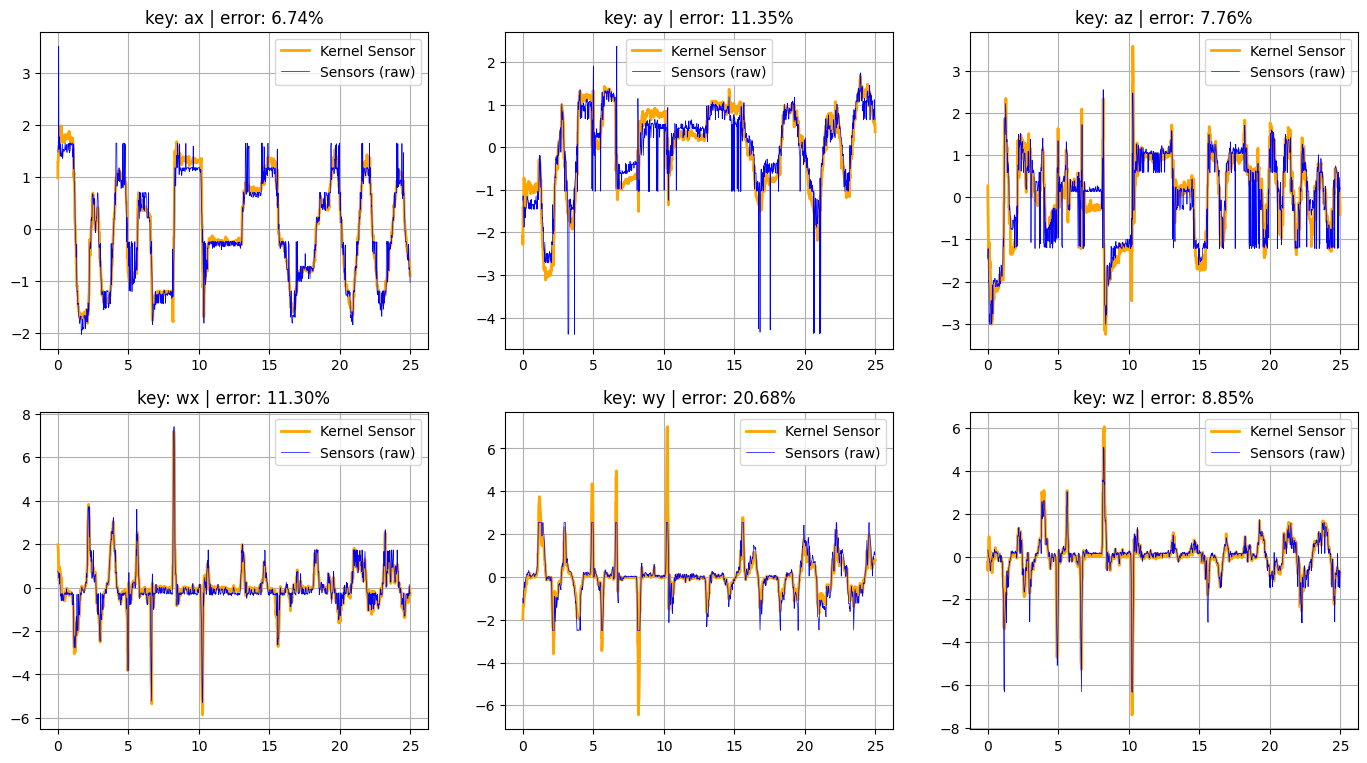

In [34]:
plt.figure(figsize=(17, 14))
index  = 0
sensor = 's2'

for key in ['ax', 'ay', 'az', 'wx', 'wy', 'wz']:
    index = index + 1

    plt.subplot(3, 3, index)
    yDesired = np.array(desired[key])
    yTarget  = np.array([s[key] for s in target[sensor]])
    d, t, score = compare(yDesired, yTarget)

    plt.plot(desired.time, d, color='orange', label='Kernel Sensor', linewidth=2)
    plt.plot(desired.time, t, color='blue',  label='Sensors (raw)', linewidth=.5)
    plt.title(f'key: {key} | error: {score*100:.2f}%')
    plt.legend(), plt.grid()

In [35]:
print(float(np.round(target.time.diff().median(), 3)))
dt = 0.020

0.02


In [36]:
target.to_pickle('../B - Filter/files/Target.pkl')
desired.to_pickle('../B - Filter/files/Desired.pkl')